# Background

![](images/stroke.jpg)

From the _American Stroke Association_:

> Stroke is a disease that affects the arteries leading to and within the brain. It is the No. 5 cause of death and a leading cause of disability in the United States. A stroke occurs when a blood vessel that carries oxygen and nutrients to the brain is either blocked by a clot or bursts (or ruptures). When that happens, part of the brain cannot get the blood (and oxygen) it needs, so it and brain cells die.

The following figure shows the main symptoms of a stroke - it is urgent to **_BE FAST_** and seek immediate medical attention if they are noticed!

![](images/be-fast.jpg)

Many factors can increase the risk of a stroke, including:

* Obesity and lack of regular exercise.
* Tobacco use and heavy drinking.
* High blood pressure and cholesterol levels.
* Cardiovascular diseases.
* Men, older people and African Americans have a higher risk of a stroke.

# Data Exploration

The dataset we'll be working with for this exercise includes a number of _features_ corresponding to the aforementioned risk factors, such as gender, age, various diseases and smoking status, that we can use to _predict_ whether a patient is likely to suffer a stroke.

Let's load the dataset and take a first look. As always, keep your eyes open for missing values, outliers and other irregularities!

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('input/stroke.csv')

In [3]:
# We'll again be using the same random state for the whole demo.
my_random_state = 9

In [4]:
data.sample(10, random_state=my_random_state)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3424,6731,Female,53.0,0,0,No,Private,Rural,235.45,NaN,formerly smoked,0
3678,18181,Male,44.0,0,0,Yes,Private,Rural,105.49,31.5,smokes,0
1777,17277,Male,4.0,0,0,No,children,Urban,97.51,22.0,Unknown,0
2800,8655,Female,51.0,0,1,Yes,Self-employed,Urban,100.96,33.4,never smoked,0
431,3655,Male,31.0,0,0,Yes,Govt_job,Rural,91.65,24.6,formerly smoked,0
866,70380,Female,20.0,0,0,No,Private,Urban,112.96,27.5,never smoked,0
3541,34657,Female,44.0,0,0,Yes,Self-employed,Urban,82.33,24.5,never smoked,0
1207,22440,Female,49.0,0,0,Yes,Private,Urban,267.76,29.3,formerly smoked,0
4242,53954,Male,17.0,0,0,No,Private,Rural,69.45,27.6,Unknown,0
777,49624,Male,69.0,0,0,Yes,Private,Urban,98.92,23.9,formerly smoked,0


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


# Visualization

Let's further investigate our data by visualizing some interesting aspects. We import the required libraries and define suitable palettes...

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
palette_default = sns.color_palette(['lightsteelblue', 'lightcoral', 'lightgray', 'wheat', 'lightpink'])
palette_stroke = sns.color_palette(['lightgray', 'lightcoral'])

sns.set_palette(palette_default)

### Gender, Age, _BMI_ And Glucose Levels

...and take a look at the expectation, that older people have a higher risk of suffering from a stroke:

<AxesSubplot:xlabel='stroke', ylabel='age'>

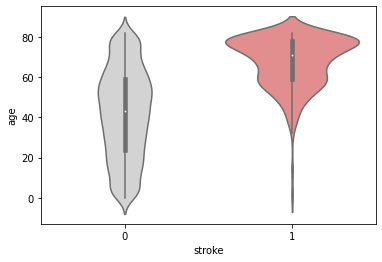

In [9]:
sns.violinplot(data=data, x='stroke', y='age', palette=palette_stroke)

Is the fact, that men pose a risk group, also represented in our dataset?

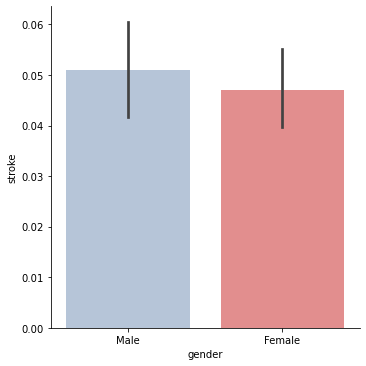

In [10]:
sns.catplot(x='gender', y='stroke', data=data, kind='bar')

Let's take a look at the _BMI_ distribution of both genders:

<AxesSubplot:xlabel='gender', ylabel='bmi'>

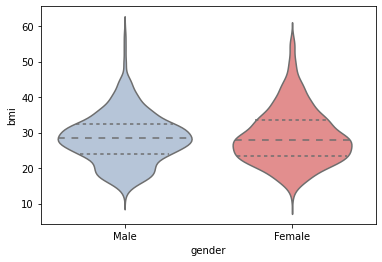

In [11]:
sns.violinplot(data=data[data['bmi'] < 60], x='gender', y='bmi', inner='quartile')

Apparently men's _BMI_ are highly concentrated around the median of ~28, while the women's indices are slightly more evenly distributed (although skewed).

The following visualization shows the _BMI_ distribution for healthy people and stroke patients:

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

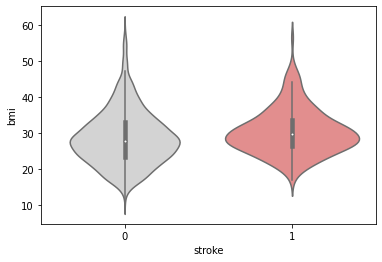

In [12]:
sns.violinplot(data=data[data['bmi'] < 60], x='stroke', y='bmi', palette=palette_stroke)

Another suitable method to visualize the risk of a stroke, is to _bin_ the _BMI_ into certain ranges (i.e. _10 to 15_, _15 to 20_ and so on):

<AxesSubplot:xlabel='bmi_bin', ylabel='stroke'>

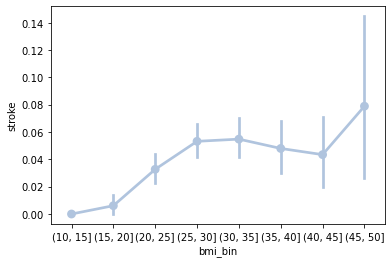

In [13]:
bmi_data = data[['bmi', 'stroke']].copy().dropna()
bmi_data['bmi_bin'] = pd.cut(bmi_data['bmi'], bins=np.arange(10, 51, 5))

sns.pointplot(x='bmi_bin', y='stroke', data=bmi_data)

We can use this technique for the average glucose level as well:

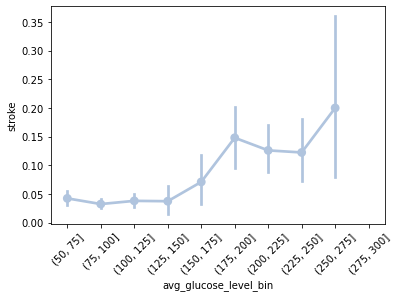

In [14]:
glucose_data = data[['avg_glucose_level', 'stroke']].copy().dropna()
glucose_data['avg_glucose_level_bin'] = pd.cut(glucose_data['avg_glucose_level'], bins=np.arange(50, 301, 25))

sns.pointplot(x='avg_glucose_level_bin', y='stroke', data=glucose_data)
plt.xticks(rotation=45);

While the risk of suffering from a stroke increases marginally with higher average glucose levels, so does the uncertainty as shown by the confidence interval.

Let's investigate this fact by plotting a _kernel density estimate_:

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

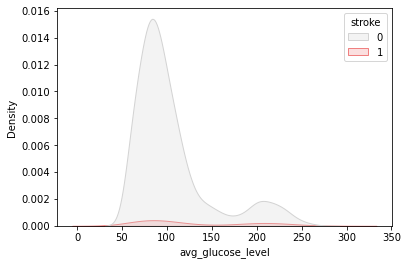

In [15]:
sns.kdeplot(data=data, x='avg_glucose_level', fill=True, hue='stroke', palette=palette_stroke)

As you probably noticed by now, we're dealing with an extremely imbalanced dataset! 

## Categorical Variables

Let's also investigate our categorical variables, such as the _smoking status_:

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

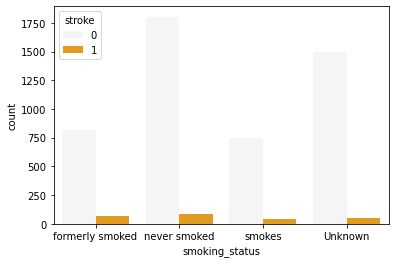

In [16]:
palette_cigarette = sns.color_palette(['whitesmoke', 'orange'])
sns.countplot(data=data, x='smoking_status', hue='stroke', palette=palette_cigarette)

While confirming our observation, that the classes are highly imbalanced, the _count plot_ is not really suitable for this situation - the imbalanced distribution makes it difficult to intepret, so we'll resort to _cat plots_ again:

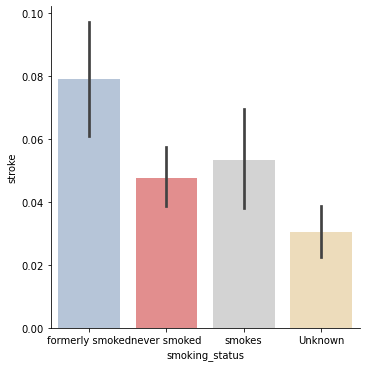

In [17]:
sns.catplot(x='smoking_status', y='stroke', data=data, kind='bar')

Apparently former smokers in our dataset have the highest risk of suffering from a stroke, while people who never smoked have the lowest one. We also have a category _unknown_ - keep that in mind for later!

Let's use the same technique for visualizing some more of our categorical columns:

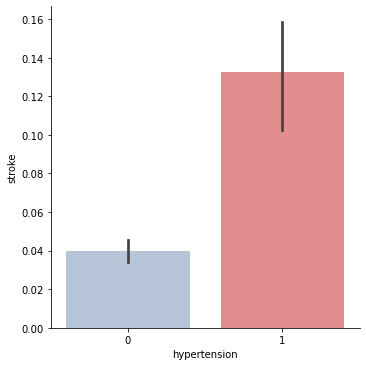

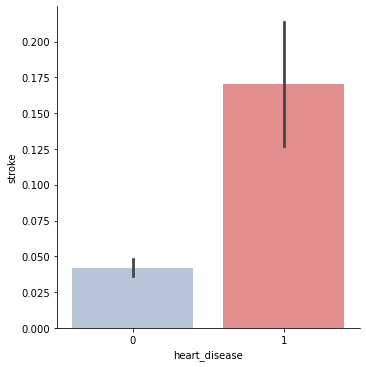

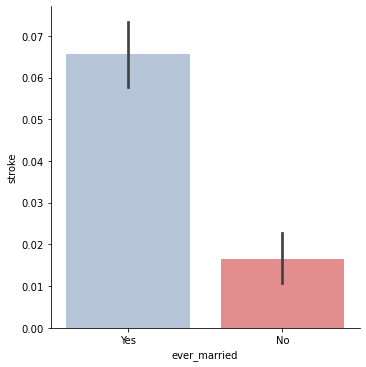

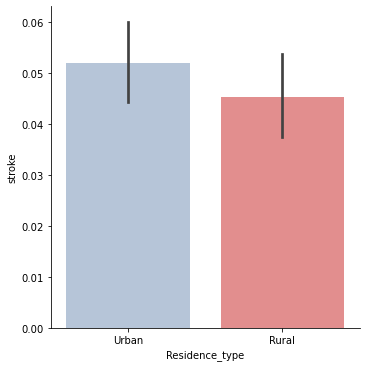

In [18]:
for curr_variable in ['hypertension', 'heart_disease', 'ever_married', 'Residence_type']:
    sns.catplot(x=curr_variable, y='stroke', data=data, kind='bar')

Another neat visualization technique for categorical values is a _point plot_, like the on we used above:

<AxesSubplot:xlabel='work_type', ylabel='stroke'>

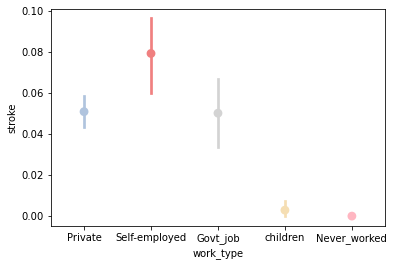

In [19]:
sns.pointplot(x='work_type', y='stroke', data=data, palette=palette_default)

## Stratification

While _seaborn_ does not provide _pie_ plots out-of-the-box, we can use the `plot`-method provided by _pandas_ for `DataFrame`s and `Series`. Let's use this to illustrate the class imbalance:

<AxesSubplot:ylabel='stroke'>

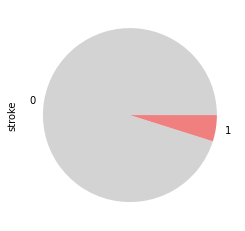

In [20]:
data['stroke'].value_counts().plot(kind='pie', colors=palette_stroke)

To ensure the same imbalanced class distribution in both training and test set, we need to use _stratification_ when splitting the data:

In [21]:
from sklearn.model_selection import train_test_split

X = data[data.columns[1:-1]]
y = data['stroke']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=my_random_state, stratify=y, test_size=0.2)

# Since the train-test-split only creates "views" of the original dataset,
# we can run into errors when manipulating the data (e.g. when imputing).
# Hence, we're creating a deep copy:
X_train = X_train_raw.copy()
X_test = X_test_raw.copy()

# Imputation

As you've hopefully noticed, we have some missing values in our dataset: The first data exploration showed some `NaN`-values in the _BMI_ column, the visualization revealed multiple _unknown_ `smoking_status`.

The following sample shows both situations:

In [22]:
X_train.sample(n=10, random_state=44)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2126,Female,44.0,0,0,Yes,Private,Rural,222.29,38.2,never smoked
3522,Female,51.0,0,0,Yes,Self-employed,Rural,97.25,21.5,never smoked
3743,Male,15.0,0,0,No,Private,Rural,122.25,21.0,never smoked
3675,Female,4.0,0,0,No,children,Rural,109.81,17.9,Unknown
3563,Female,55.0,0,1,Yes,Private,Urban,199.38,39.0,Unknown
3343,Male,41.0,0,0,No,Private,Urban,70.55,44.2,Unknown
3184,Female,22.0,0,0,No,Govt_job,Urban,87.25,24.9,smokes
3196,Male,60.0,0,0,Yes,Self-employed,Rural,212.02,NaN,Unknown
4696,Male,67.0,0,0,Yes,Private,Rural,86.96,31.4,formerly smoked
64,Male,75.0,0,0,Yes,Private,Urban,104.72,NaN,Unknown


Since both features are clear risk factors for suffering a stroke, it's not a good idea to simply remove the columns.

We already learned how to deal missing numerical values, so let's take care of the _BMI_ column by replacing missing values with the _median_ of the column:

N.B.: Keep in mind, that we **_fit only on the training data_** so we don't _learn_ anything from the test data!

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
simple_imputer = SimpleImputer(strategy='median')

X_train[['bmi']] = simple_imputer.fit_transform(X_train[['bmi']])
X_test[['bmi']] = simple_imputer.transform(X_test[['bmi']])

## Imputing Categorical Values

We obviously can't apply _mathematical_ strategies such as the mean or the median when imputing categorical data. Instead we can deal with missing values using the self-explanatory `most_frequent`-strategy - or use a `constant` replacement.

As you probably noticed, there seems to be a lot of `children`, who have an `Unknown` `smoking_status`. We can safely assume, that they `never smoked`:

In [25]:
simple_imputer = SimpleImputer(strategy='constant', fill_value='never smoked', missing_values='Unknown')

X_train.loc[X_train['work_type'] == 'children', 'smoking_status'] = simple_imputer.fit_transform(X_train.loc[X_train['work_type'] == 'children'][['smoking_status']]).ravel()
X_test.loc[X_test['work_type'] == 'children', 'smoking_status'] = simple_imputer.transform(X_test.loc[X_test['work_type'] == 'children'][['smoking_status']]).ravel()

What about the others? Let's be prejudiced and assume, that there's a reason, why somebody doesn't want to reveal their smoking status - and simply replace all `Unknown` values with the constant `smokes`. Since this is quite a big assumption, we'll additionally introduce a column to _flag_ the rows where the value was missing.

In [26]:
X_train['smoking_status_was_missing'] = X_train['smoking_status'] == 'Unknown'
X_test['smoking_status_was_missing'] = X_test['smoking_status'] == 'Unknown'

In [27]:
simple_imputer = SimpleImputer(strategy='constant', fill_value='smokes', missing_values='Unknown')

X_train[['smoking_status']] = simple_imputer.fit_transform(X_train[['smoking_status']])
X_test[['smoking_status']] = simple_imputer.transform(X_test[['smoking_status']])

The following sample shows the success of our imputation:

In [28]:
X_train.sample(n=5, random_state=10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,smoking_status_was_missing
1568,Female,65.0,0,0,Yes,Private,Urban,72.49,28.9,smokes,False
4548,Female,17.0,0,0,No,Private,Rural,79.62,21.6,never smoked,False
619,Male,43.0,0,0,Yes,Private,Urban,111.43,21.9,smokes,False
3160,Male,42.0,0,0,Yes,Private,Urban,177.91,28.1,smokes,True
2069,Female,66.0,0,0,Yes,Private,Urban,202.05,31.7,smokes,False


## Our First Model

Time to train our first model!

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
try:
    rf_model = RandomForestClassifier(random_state=my_random_state)
    rf_model.fit(X_train, y_train)
except Exception as e:
    print('Exception occurred:')
    print(e)

Exception occurred:
could not convert string to float: 'Male'


As you've expected, it wasn't going to be that easy: The algorithm can't work with _string_ values, and we have quite a few as the following output shows:

In [31]:
X_train.select_dtypes(exclude=np.number).sample(10, random_state=1)

,gender,ever_married,work_type,Residence_type,smoking_status,smoking_status_was_missing
1131,Female,Yes,Private,Rural,never smoked,False
3567,Male,Yes,Private,Rural,smokes,False
245,Female,No,children,Rural,never smoked,False
2991,Female,Yes,Private,Urban,never smoked,False
3278,Female,Yes,Private,Urban,smokes,True
4848,Male,Yes,Govt_job,Rural,formerly smoked,False
2434,Female,Yes,Govt_job,Urban,never smoked,False
664,Male,Yes,Private,Rural,never smoked,False
3239,Female,No,children,Rural,never smoked,False
3815,Male,Yes,Govt_job,Rural,smokes,True


# Encoding Categorical Values

How will we deal with categorical data? To answer that question we first have to distinguish two types of categorical data:

* **_Ordinal data_** is classified into categories that have a natural rank order (where the distances between the categories are not known). Examples include _school grades_, _olympic medals_...
* **_Nominal data_** (also called _named data_) is defined as data that is used for naming or labelling variables without any quantitative value. Examples of categories without intrinsic ordering include _race_, _hair color_, _favorite music genre_...

## Ordinal Encoding

Let's take a look at some example data containing two columns: One for _school grades_ and one for _sex_. While latter is _not ordinal_ per se but rather binary, we can still encode it in the same fashion.

In [32]:
example_data = pd.DataFrame({'grade': ['GUT', 'NGD', 'BEF', 'SGT', 'GEN', 'SGT', 'GUT'], 'sex': ['f', 'm', 'm', 'f', 'f', 'm', 'm']})
example_data

,grade,sex
0,GUT,f
1,NGD,m
2,BEF,m
3,SGT,f
4,GEN,f
5,SGT,m
6,GUT,m


_scikit-learn_ provides an `OrdinalEncoder` that can be used to easily encode ordinal data. Analogous to the `Imputer` we use _fit_ and _transform_ to apply it to our data:

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(example_data[['grade', 'sex']])

array([[2., 0.],
       [3., 1.],
       [0., 1.],
       [4., 0.],
       [1., 0.],
       [4., 1.],
       [2., 1.]])

The result for the school grade is not quite satisfying - after all, how should _scikit-learn_ know, how to rank Austrian grades?

We can provide the ordering as follows:

In [35]:
ordinal_encoder = OrdinalEncoder(categories=[['SGT', 'GUT', 'BEF', 'GEN', 'NGD']])
ordinal_encoder.fit_transform(example_data[['grade']])

array([[1.],
       [4.],
       [2.],
       [0.],
       [3.],
       [0.],
       [1.]])

Let's take closer look to see which columns we can apply ordinal encoding to:

In [36]:
for curr_col in X_train.select_dtypes(exclude=np.number).columns:
    print(curr_col)
    print(X_train[curr_col].unique())

gender
['Male' 'Female']
ever_married
['Yes' 'No']
work_type
['Govt_job' 'Self-employed' 'Private' 'children' 'Never_worked']
Residence_type
['Urban' 'Rural']
smoking_status
['smokes' 'formerly smoked' 'never smoked']
smoking_status_was_missing
[False  True]


Since the columns `gender`, `ever_married` and `Residence_type` are _binary_ we can easily encode them like we did before:

N.B.: Notice the missing quotation marks in the `smoking_status_was_missing`-column, indicating a _boolean_ value, which we don't need to encode.

In [37]:
ordinal_encoder = OrdinalEncoder()

X_train[['gender', 'ever_married', 'Residence_type']] = ordinal_encoder.fit_transform(X_train[['gender', 'ever_married', 'Residence_type']])
X_test[['gender', 'ever_married', 'Residence_type']] = ordinal_encoder.transform(X_test[['gender', 'ever_married', 'Residence_type']])

The next obvious choice is the `smoking_status`, constituting a _real_ ordinal variable, since there's a clear order. After taking a closer look at the unique values in the column, we can create an ordered list and use the `OrdinalEncoder` to convert the categorial variable to a numerical one:

In [38]:
smoking_status_ordered = ['never smoked', 'formerly smoked', 'smokes']

ordinal_encoder = OrdinalEncoder(categories=[smoking_status_ordered])

X_train[['smoking_status']] = ordinal_encoder.fit_transform(X_train[['smoking_status']])
X_test[['smoking_status']] = ordinal_encoder.transform(X_test[['smoking_status']])

Let's take a look at the result:

In [39]:
X_train.sample(10, random_state=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,smoking_status_was_missing
1131,0.0,47.0,0,0,1.0,Private,0.0,195.04,45.5,0.0,False
3567,1.0,39.0,1,0,1.0,Private,0.0,88.18,33.5,2.0,False
245,0.0,14.0,0,0,0.0,children,0.0,57.93,30.9,0.0,False
2991,0.0,47.0,0,0,1.0,Private,1.0,74.63,45.3,0.0,False
3278,0.0,27.0,0,0,1.0,Private,1.0,127.28,23.4,2.0,True
4848,1.0,75.0,0,0,1.0,Govt_job,0.0,93.93,24.4,1.0,False
2434,0.0,49.0,0,0,1.0,Govt_job,1.0,117.34,21.6,0.0,False
664,1.0,56.0,0,0,1.0,Private,0.0,81.18,26.9,0.0,False
3239,0.0,7.0,0,0,0.0,children,0.0,73.27,19.5,0.0,False
3815,1.0,43.0,0,0,1.0,Govt_job,0.0,56.08,23.9,2.0,True


## _One-Hot Encoding_

Unfortunately we can't use ordinal encoding for our last categorical column `work_type`: Assigning numerical values to nominal variables' values would create a fictional ranking between them, which could lead to wrong assumptions in the model and thus poor performance.

In this case, **_one-hot encoding_** can be applied to _binarize_ the nominal data: For each possible category (e.g. _red, green_ and _blue_) a new binary column (e.g. _is-red, is-green_ and _is-blue_) is created.

This is demonstrated in the following example:

In [40]:
example_data = pd.DataFrame({'favorite_color': ['blue', 'red', 'blue', 'green', 'red']})
example_data

,favorite_color
0,blue
1,red
2,blue
3,green
4,red


We can now use _scikit-learn_'s `OneHotEncoder` to create _dummy variables_ from the `favorite_color` column:

N.B.: _pandas_ provides a `sparse`-data-structure for efficiently storing data with lots of zeroes. We don't want the matrix to be _compressed_, since we'll be adding it to our dataframe - hence the `False`-parameter.

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_raw = one_hot_encoder.fit_transform(example_data[['favorite_color']])

pd.DataFrame(one_hot_raw, columns=one_hot_encoder.get_feature_names())

,x0_blue,x0_green,x0_red
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


Let's now apply one-hot-encoding to our `work_type`-column. Note that we drop the original column, since we don't need it anymore.

In [43]:
one_hot_encoder = OneHotEncoder(sparse=False)

one_hot_raw = pd.DataFrame(one_hot_encoder.fit_transform(X_train[['work_type']]), columns=one_hot_encoder.get_feature_names())
# We need to re-set the original index, since it gets lost in the process.
one_hot_raw.index = X_train.index
X_train = pd.concat([X_train, one_hot_raw], axis=1)
X_train.drop(['work_type'], axis=1, inplace=True)

one_hot_raw = pd.DataFrame(one_hot_encoder.transform(X_test[['work_type']]), columns=one_hot_encoder.get_feature_names())
one_hot_raw.index = X_test.index
X_test = pd.concat([X_test, one_hot_raw], axis=1)
X_test.drop(['work_type'], axis=1, inplace=True)

Let's see how our final, processed data looks like:

In [44]:
X_train.sample(10, random_state=1)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,smoking_status_was_missing,x0_Govt_job,x0_Never_worked,x0_Private,x0_Self-employed,x0_children
1131,0.0,47.0,0,0,1.0,0.0,195.04,45.5,0.0,False,0.0,0.0,1.0,0.0,0.0
3567,1.0,39.0,1,0,1.0,0.0,88.18,33.5,2.0,False,0.0,0.0,1.0,0.0,0.0
245,0.0,14.0,0,0,0.0,0.0,57.93,30.9,0.0,False,0.0,0.0,0.0,0.0,1.0
2991,0.0,47.0,0,0,1.0,1.0,74.63,45.3,0.0,False,0.0,0.0,1.0,0.0,0.0
3278,0.0,27.0,0,0,1.0,1.0,127.28,23.4,2.0,True,0.0,0.0,1.0,0.0,0.0
4848,1.0,75.0,0,0,1.0,0.0,93.93,24.4,1.0,False,1.0,0.0,0.0,0.0,0.0
2434,0.0,49.0,0,0,1.0,1.0,117.34,21.6,0.0,False,1.0,0.0,0.0,0.0,0.0
664,1.0,56.0,0,0,1.0,0.0,81.18,26.9,0.0,False,0.0,0.0,1.0,0.0,0.0
3239,0.0,7.0,0,0,0.0,0.0,73.27,19.5,0.0,False,0.0,0.0,0.0,0.0,1.0
3815,1.0,43.0,0,0,1.0,0.0,56.08,23.9,2.0,True,1.0,0.0,0.0,0.0,0.0


## Finally - Our First Model

Now that we prepared our data we can finally train a model...

In [45]:
rf_model = RandomForestClassifier(random_state=my_random_state, n_estimators=300)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=9)

...and see how it performs:

In [46]:
from sklearn import metrics

In [47]:
y_pred = rf_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 94.81%


Fortunately you know better by now, that our work here is not done yet, just becaue we reached amazing accuracy... let's take a look at the other metrics:

In [48]:
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

Precision: 0.00%
Recall: 0.00%
F1: 0.00%


And there we have it: Our model simply labels everything as _not a stroke_... but why is the performance so bad?

# Dealing With Imbalance

To answer this question, let's revisit the label distribution of our dataset:

<AxesSubplot:ylabel='stroke'>

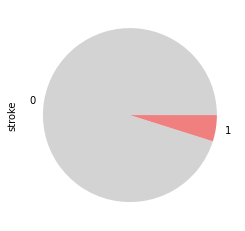

In [49]:
y.value_counts().plot(kind='pie', colors=palette_stroke)

In [50]:
y.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

What we're dealing with here is a severely **_imbalanced dataset_**, as described by _Jason Brownlee_ from _Machine Learning Mastery_:

> Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.
>This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.

But how can we deal with the problematic imbalance? An obvious prerequisite, that we already discussed and applied is using alternative metrics: If we relied on _accuracy_, we wouldn't evem have found out about our problem. _Brownlee_ suggests two alternative approaches:

>One approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.

So for now, we have two easy options (we'll take a look at a more sophisticated approach later) for dealing with the imbalance:

* For **_Random Undersampling_** we randomly delete some observations from the **_majority class_**.
* For **_Random Oversampling_** we randomly duplicate some observations from the **_minority class_**.

## _Random Undersampling_

Let's try out the first approach: Luckily, there is _Imbalanced-learn_ (imported as `imblearn`) - an open source library providing tools when dealing with classification with imbalanced classes.

In [51]:
from imblearn.under_sampling import RandomUnderSampler

By parameterizing `sampling_strategy` with $1$, we _randomly undersample_ the majority class to achieve a 1:1 ratio to the minority class. E.g. by using $0.5$ the minority class would have _half_ the number of samples as the majority class.

Note, that we **only apply the resampling on the _training_ data**, since we only want to influence the fit of the model by giving it a better class distribution for learning. Since we expect _real-world_-data to have the same distribution as our dataset (i.e. ~5% of people risk suffering from a stroke), resampling the test data would create an unrealistic scenario giving us no insights about our model's real performance.

In [52]:
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=my_random_state)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

In [53]:
y_under.value_counts()

0    199
1    199
Name: stroke, dtype: int64

In [ ]:
rf_model = RandomForestClassifier(random_state=my_random_state)
rf_model.fit(X_under, y_under)

y_pred = rf_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

Not that bad - while our new model seems to be overeager to classify observations as strokes (resulting in lots of _false positives_ which results in low _precision_), it's still preferable to simply saying no one is at risk of suffering from it.

N.B.: Of course it would make sense to use _cross-validation_ - unfortunately things would get more complicated in this scenario. Thus we're skipping it for didactic reasons.

## _Random Oversampling_

The _opposite_ of _undersampling_ the majority class is _oversampling_ the minority class: For this, random copies of existing observations from the minority class are created until a desired distribution is reached.

We can also achieve this using `imblearn`:

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversampler = RandomOverSampler(sampling_strategy=1, random_state=my_random_state)
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [ ]:
y_over.value_counts()

Before we evaluate this approach: What do you think will happen? Is it a good idea to duplicate the same samples over and over?

In [ ]:
rf_model = RandomForestClassifier(random_state=my_random_state)
rf_model.fit(X_over, y_over)

y_pred = rf_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

As we see, our performance got even worse with the high over-sampling rate. A possible reason is described by Fernández et al. in _Learning from Imbalanced Data Sets_:

> … the random oversampling may increase the likelihood of occurring overfitting, since it makes exact copies of the minority class examples. In this way, a symbolic classifier, for instance, might construct rules that are apparently accurate, but actually cover one replicated example.

What about a combination of both approaches? We could try only slighly oversampling our stroke cases and then use undersampling to balance the class distribution:

In [ ]:
oversampler = RandomOverSampler(sampling_strategy=0.1, random_state=my_random_state)
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [ ]:
y_over.value_counts()

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=my_random_state)

In [ ]:
X_over, y_over = undersampler.fit_resample(X_over, y_over)

In [ ]:
y_over.value_counts()

In [ ]:
rf_model = RandomForestClassifier(random_state=my_random_state)
rf_model.fit(X_over, y_over)

y_pred = rf_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

## _SMOTE_

While balancing our class distribution by randomly duplicating samples and improving our performance (in combination with undersampling), oversampling didn't add any new information to our model.

A possible improvement to duplicating random observations from the minority class is synthesizing (i.e. creating new data artificially) new samples. _**S**ynthetic **M**inority **O**versampling **TE**chnique_, or _SMOTE_, is a widely used approach for this data augmentation procedure. The technique was proposed by Chawla et al. in their 2002 paper:

> We propose an over-sampling approach in which the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement. [...] The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the k minority class nearest neighbors. [...] Synthetic samples are generated in the following way: Take the diﬀerence between the feature vector (sample) under consideration and its nearest neighbor. Multiply this diﬀerence by a random number between 0 and 1, and add it to the feature vector under consideration. This causes the selection of a random point along the line segment between two speciﬁc features.


The following figure illustrates the technique:

![](images/smote.png)

Before we try out _SMOTE_, let's reflect on the meaning of _nearest neighbor_ for a moment. Our dataset contains variables with various ranges, such as the age, the _BMI_ and the average glucose level:

In [ ]:
X_train.sample(5, random_state=my_random_state).loc[:,['age', 'bmi', 'avg_glucose_level']]

In [ ]:
sns.kdeplot(X_train['age'])
sns.kdeplot(X_train['bmi'])
sns.kdeplot(X_train['avg_glucose_level'])

plt.xlabel(None)
plt.legend(title='Feature', loc='upper right', labels=['age', 'bmi', 'avg_glucose_level'])

Since calculating nearest neighbors relies on the _Euclidean distance_, we risk that features with large ranges (such as the glucose level) will dominate the calculation.

We can apply _standardization_ to handle this problem: this involves rescaling the distribution of values so that the _mean_ of observed values is 0 and the _standard deviation_ is 1.

This can be easily achieved using _scikit-learn_'s `StandardScaler` as follows:

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled.index = X_train.index
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_test_scaled.index = X_test.index
X_test_scaled.columns = X_test.columns

The standardized data now looks like this:

In [ ]:
X_train_scaled.sample(5, random_state=my_random_state).loc[:,['age', 'bmi', 'avg_glucose_level']]

In [ ]:
sns.kdeplot(X_train_scaled['age'])
sns.kdeplot(X_train_scaled['bmi'])
sns.kdeplot(X_train_scaled['avg_glucose_level'])

plt.xlabel(None)
plt.legend(title='Feature', loc='upper right', labels=['age', 'bmi', 'avg_glucose_level'])

We can now use _SMOTE_, which is also included in the `imblearn` library. We'll apply the same strategy as before and combine slight oversampling (using _SMOTE_) with random undersampling:

N.B.: Since _SMOTE_ is originally designed for numerical data, we'll be using `SMOTENC` - _**S**ynthetic **M**inority **O**ver-sampling **TE**chnique - (for) **N**ominal And **C**ontinuous Data_.

In [ ]:
from imblearn.over_sampling import SMOTENC

In [ ]:
smote = SMOTENC(random_state=my_random_state, sampling_strategy=0.1, categorical_features=[0, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14])
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

y_smote.value_counts()

In [ ]:
undersampler = RandomUnderSampler(random_state=my_random_state, sampling_strategy=1)
X_smote, y_smote = undersampler.fit_resample(X_smote, y_smote)

y_smote.value_counts()

In [ ]:
rf_model = RandomForestClassifier(random_state=my_random_state)
rf_model.fit(X_smote, y_smote)

y_pred = rf_model.predict(X_test_scaled)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))    

# Conclusion

In this demo we covered how to work with categorical data using two different approaches for encoding. We also experienced working with severely imbalanced class distributions and discovered techniques that allow us to compensate for the problems that come with it.

While being slightly underwhelming, we were able to train a half-decent model on a dataset which was unusable beforehand. Note, that the results may extremely vary given the stochastic nature of the algorithm and evaluation procedure.